In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error ,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions , decision_regions 
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor 
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('deaths.csv')

In [3]:
df.head(3)

,peak_id,peak_name,name,yr_season,date,time,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,08:30,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,08:30,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,11:15,New Zealand,M,23,No,.,Avalanche (6100m)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   peak_id         1104 non-null   object
 1   peak_name       1104 non-null   object
 2   name            1104 non-null   object
 3   yr_season       1104 non-null   object
 4   date            1104 non-null   object
 5   time            557 non-null    object
 6   citizenship     1104 non-null   object
 7   gender          1104 non-null   object
 8   age             1104 non-null   int64 
 9   is_o2_used      1104 non-null   object
 10  is_summiter     1104 non-null   object
 11  cause_of_death  1104 non-null   object
dtypes: int64(1), object(11)
memory usage: 103.6+ KB


In [5]:
df.describe()

,age
count,1104.000000
mean,30.293478
std,16.182350
min,0.000000
25%,25.000000
50%,32.000000
75%,40.000000
max,85.000000


In [6]:
df.isnull().sum()

peak_id             0
peak_name           0
name                0
yr_season           0
date                0
time              547
citizenship         0
gender              0
age                 0
is_o2_used          0
is_summiter         0
cause_of_death      0
dtype: int64

In [7]:
new_df = df.drop(columns=['time'])

In [8]:
new_df.isnull().sum()


peak_id           0
peak_name         0
name              0
yr_season         0
date              0
citizenship       0
gender            0
age               0
is_o2_used        0
is_summiter       0
cause_of_death    0
dtype: int64

In [9]:
new_df.drop_duplicates()


,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23,No,.,Avalanche (6100m)
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31,No,.,Fall (5300m)
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28,No,.,Fall (5300m)
...,...,...,...,...,...,...,...,...,...,...,...
1099,YALU,Yalung Kang,Ang Dawa Sherpa (Solukhumbu),1989 Win,Dec 20,Nepal,M,29,Y,Y,Fall (8500m)
1100,YALU,Yalung Kang,Tchiring Chumbi (Tchiring Thebe) Sherpa (Nupri...,1989 Win,Dec 20,Nepal,M,36,Y,Y,Fall (8500m)
1101,YALU,Yalung Kang,Chhanda Gayen,2014 Spr,May 20,India,F,34,Y,.,Fall (8200m)
1102,YALU,Yalung Kang,"Dawa Wangchu Sherpa (Tamku-5, Makalu-Barun)",2014 Spr,May 20,Nepal,M,28,Y,.,Fall (8200m)


In [10]:
new_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1099    False
1100    False
1101    False
1102    False
1103    False
Length: 1104, dtype: bool

In [11]:
new_df.head(3)

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23,No,.,Avalanche (6100m)


In [12]:
# new_data = new_df.drop(columns=['peak_id'])

In [13]:
new_df.head(3)

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23,No,.,Avalanche (6100m)


In [14]:
new_df[['year' , 'seasone']] = new_df['yr_season'].str.split(' ' , expand=True)

In [15]:
new_df = new_df.drop(columns=['yr_season'])

In [16]:
new_df.head(3)

,peak_id,peak_name,name,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death,year,seasone
0,AMAD,Ama Dablam,Michael John (Mike) Harris,May 21,UK,M,33,No,.,Fall (6550m),1959,Spr
1,AMAD,Ama Dablam,George James Fraser,May 21,UK,M,27,No,.,Fall (6550m),1959,Spr
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,Oct 24,New Zealand,M,23,No,.,Avalanche (6100m),1979,Aut


In [17]:
new_df['is_summiter'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1099    False
1100    False
1101    False
1102    False
1103    False
Name: is_summiter, Length: 1104, dtype: bool

In [18]:
new_df.isnull().sum()

peak_id           0
peak_name         0
name              0
date              0
citizenship       0
gender            0
age               0
is_o2_used        0
is_summiter       0
cause_of_death    0
year              0
seasone           0
dtype: int64

In [19]:
new_df.fillna('Unknown', inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'peak_name', 'citizenship', 'gender', 'is_o2_used', 'is_summiter', 'cause_of_death', 'seasone']

for col in categorical_columns:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le

# Verify encoding
print(new_df.head())

  peak_id  peak_name                        name    date  citizenship  gender  \
0    AMAD          0  Michael John (Mike) Harris  May 21           48       1   
1    AMAD          0         George James Fraser  May 21           48       1   
2    AMAD          0  Kenneth James (Ken) Hyslop  Oct 24           35       1   
3    AMAD          0                Guido Bumann  Oct 27           46       1   
4    AMAD          0                   Maya Senn  Oct 27           46       0   

   age  is_o2_used  is_summiter  cause_of_death  year  seasone  
0   33           1            0             234  1959        1  
1   27           1            0             234  1959        1  
2   23           1            0              95  1979        0  
3   31           1            0             215  1983        0  
4   28           1            0             215  1983        0  


In [20]:
# Initialize label encoders
label_encoders = {}
for col in categorical_columns:
    if col in new_df.columns:
        le = LabelEncoder()
        new_df[col] = le.fit_transform(new_df[col].astype(str))
        label_encoders[col] = le

In [21]:
new_df.head(3)

,peak_id,peak_name,name,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death,year,seasone
0,AMAD,0,Michael John (Mike) Harris,May 21,43,1,33,1,0,151,1959,1
1,AMAD,0,George James Fraser,May 21,43,1,27,1,0,151,1959,1
2,AMAD,0,Kenneth James (Ken) Hyslop,Oct 24,29,1,23,1,0,360,1979,0


In [22]:
# Example of creating a new feature based on existing columns
new_df['is_spring_season'] = new_df['seasone'].apply(lambda x: 1 if x == 'Spring' else 0)

# Verify the new featureprint(new_df.head(3))

In [24]:
new_df = new_df.drop(columns='peak_id')

In [25]:
new_df.head(3)

,peak_name,name,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death,year,seasone,is_spring_season
0,0,Michael John (Mike) Harris,May 21,43,1,33,1,0,151,1959,1,0
1,0,George James Fraser,May 21,43,1,27,1,0,151,1959,1,0
2,0,Kenneth James (Ken) Hyslop,Oct 24,29,1,23,1,0,360,1979,0,0


In [34]:
# Example DataFrame
data = {
    'name': ['David Brister', 'Alice Johnson', 'John Doe'],
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6],
    'target': [0, 1, 0]
}
new_df = pd.DataFrame(data)

In [36]:
# Separate features and target
X = new_df.drop('target', axis=1)
y = new_df['target']

In [37]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [39]:
# Apply OneHotEncoder to categorical columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [40]:
# Transform the features
X_transformed = preprocessor.fit_transform(X)

# Convert transformed features back to a DataFrame (optional)
X_transformed_df = pd.DataFrame(X_transformed)


In [53]:
new_transform_train_x , new_transform_train_y , new_transform_test_x , new_transform_test_y  = train_test_split(X_transformed_df , y , test_size=0.2 , random_state=42)

In [60]:
# Define models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

In [63]:
rf_model.fit(X_transformed_df , y)

RandomForestClassifier(random_state=42)

In [64]:
rf_model.score(X_transformed , y)*100

100.0

In [65]:
svm_model.fit(X_transformed_df , y)

SVC(random_state=42)

In [66]:
svm_model.score(X_transformed_df , y)*100

66.66666666666666

In [70]:
lr = LogisticRegression()

In [72]:
lr.score(X_transformed_df , y)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
# Define the target variable and features
target_new = 'cause_of_death'
features_new = [col for col in new_df.columns if col != target_new]

In [51]:
X_new = new_df[features_new]
y_new = new_df[target_new]

KeyError: 'cause_of_death'

In [29]:
train_x, train_y, test_x, test_y = train_test_split(X_new, y_new , test_size=0.2 , random_state=42)

In [30]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)


In [32]:
# Train models
rf_model.fit(train_x, train_y)
svm_model.fit(train_y, train_y)

ValueError: could not convert string to float: 'David Brister'

# Visualization And EDA

In [60]:
# Display summary statistics
summary_statistics = new_data.describe(include='all')

In [61]:
# Distribution of deaths by year
deaths_by_year = new_data['year'].value_counts().sort_index()


In [62]:
# Distribution of deaths by season
deaths_by_season = new_data['seasone'].value_counts()

In [63]:
# Distribution of deaths by age and gender
age_distribution = new_data['age'].value_counts().sort_index()
gender_distribution = new_data['gender'].value_counts()

In [64]:
# Analysis of causes of death
causes_of_death = new_data['cause_of_death'].value_counts()

In [65]:
# Plotting
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

## 1.) Distribution Of Deaths By Year

Text(0, 0.5, 'Number of Deaths')

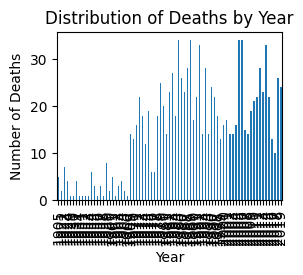

In [66]:
# Distribution of deaths by year
plt.subplot(2, 2, 1)
deaths_by_year.plot(kind='bar')
plt.title('Distribution of Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')

# 2.) Distribution of deaths by season


Text(0, 0.5, 'Number of Deaths')

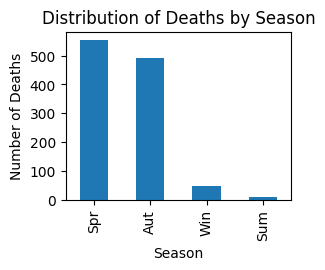

In [67]:
plt.subplot(2, 2, 2)
deaths_by_season.plot(kind='bar')
plt.title('Distribution of Deaths by Season')
plt.xlabel('Season')
plt.ylabel('Number of Deaths')

# 3.) Distribution of deaths by age


Text(0, 0.5, 'Number of Deaths')

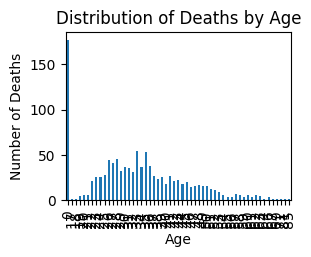

In [68]:
plt.subplot(2, 2, 3)
age_distribution.plot(kind='bar')
plt.title('Distribution of Deaths by Age')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

# 4.) Distribution of deaths by gender


Text(0, 0.5, 'Number of Deaths')

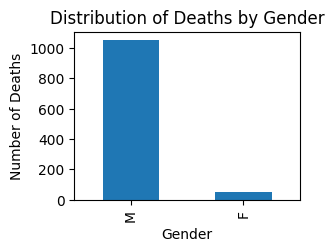

In [69]:
plt.subplot(2, 2, 4)
gender_distribution.plot(kind='bar')
plt.title('Distribution of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')

# 5.) Plotting causes of death


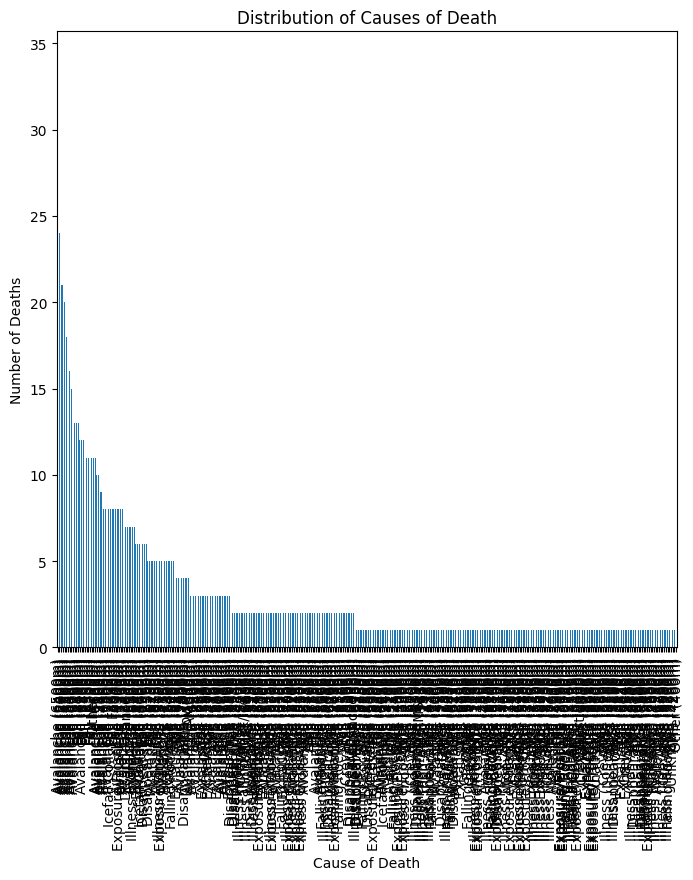

In [71]:
plt.figure(figsize=(8, 8))
causes_of_death.plot(kind='bar')
plt.title('Distribution of Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.show()

# Display summary statistics


In [72]:
summary_statistics

,peak_name,name,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death,year,seasone
count,1104,1104,1104,1104,1104,1104.000000,1104,1104,1104,1104,1104
unique,86,1075,178,55,2,NaN,3,2,365,75,4
top,Everest,Unknown,Dec 31,Nepal,M,NaN,No,.,Avalanche (6500m),1989,Spr
freq,306,15,27,315,1053,NaN,883,865,34,34,555
mean,NaN,NaN,NaN,NaN,NaN,30.293478,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,16.182350,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN


In [144]:
# Encoding categorical variables using LabelEncoder for simplicity
label_encoders = {}
categorical_columns = ['peak_name', 'citizenship', 'gender', 'is_o2_used', 'is_summiter', 'seasone']

In [153]:
new_data.fillna('Unknown', inplace=True)

In [154]:

# for col in categorical_columns:
#     le = LabelEncoder()
#     new_data[col] = le.fit_transform(new_data[col])
#     label_encoders[col] = le


In [155]:
new_data.head(3)

,name,date
0,Michael John (Mike) Harris,May 21
1,George James Fraser,May 21
2,Kenneth James (Ken) Hyslop,Oct 24


In [156]:
# Define categorical and numerical columns
categorical_columns = ['peak_name', 'citizenship', 'gender', 'is_o2_used', 'is_summiter', 'seasone' , 'name' , 'date']
numerical_columns = ['age', 'year']

In [175]:
new_data.head(3)

,name,date
0,Michael John (Mike) Harris,May 21
1,George James Fraser,May 21
2,Kenneth James (Ken) Hyslop,Oct 24


In [157]:
from sklearn.compose import ColumnTransformer
# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)


In [170]:
# Define the target variable and features
target =  'cause_of_death' # example target
features = [col for col in new_data.columns if col != target]


In [171]:
# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

In [172]:
# Create a pipeline to combine preprocessor and model
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(random_state=42))])


In [173]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:
new_data.fillna('Unknown' , inplace=True)

In [178]:
# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'peak_name', 'citizenship', 'gender', 'is_o2_used', 'is_summiter', 'cause_of_death', 'seasone']

for col in categorical_columns:
    le = LabelEncoder()
    new_data[col] = le.fit_transform(new_data[col])
    label_encoders[col] = le

KeyError: 'peak_name'